In [1]:
import pandas as pd
from typing import List
import time
from matplotlib import pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Use case :


#### Experiments

In [2]:
from evaluate import (GeneralExperiment,
                      SpecializedExperiment)

exp_Eg = GeneralExperiment(preds=None, target=None)
exp_Es = SpecializedExperiment(preds=None, target=None)

/opt/homebrew/Caskroom/miniconda/base/envs/nlp1/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/Caskroom/miniconda/base/envs/nlp1/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/Caskroom/miniconda/base/envs/nlp1/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


ImportError: cannot import name 'GeneralExperiment' from 'evaluate' (/opt/homebrew/Caskroom/miniconda/base/envs/nlp1/lib/python3.11/site-packages/evaluate/__init__.py)

#### Models

In [ ]:
from models import (EpiLLM,
                    BaseModel,
                    Baseline)


for modclass in [EpiLLM, BaseModel, Baseline]:
    ## instantiate
    model = modclass()

    ## load params/ pipeline
    model.load_model()

    ## train
    model.train()

    ## test
    pred = model.predict()

#### EpiScape

In [3]:
from episcape import (PatientGenerator,
                      SDeHRGenerator)

patient_gen = PatientGenerator()
sdehr_gen = SDeHRGenerator(temperature=.5, version=0)

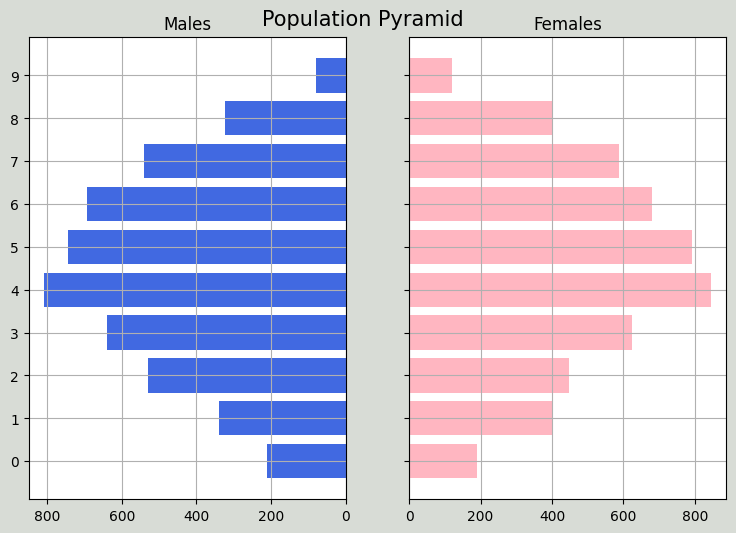

In [5]:
from misc import plot_age_pyramid

N_PATIENTS = 10_000
test = patient_gen.generate(N_PATIENTS)
test["age_b10"] = test.age // 10


plot_age_pyramid(
    pd.pivot(test.groupby(["age_b10", "gender"]).count().reset_index(), 
             index="age_b10",
             columns="gender",
             values="age"
    ).reset_index().rename({
    "age_b10": "Age"
}, axis=1))

In [6]:
%timeit patient_gen.generate(10_000)

967 ms ± 6.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
test = patient_gen.generate(10)
res = []
times = []
start = time.time()
for test_patient in test.to_dict(orient="records"):
    res.append(sdehr_gen.generate_sdehr(test_patient))
    times.append(time.time() - start)
    start = time.time()    

time report of queries of `gpt-3.5-turbo` :

Text(0, 0.5, 'time [s]')

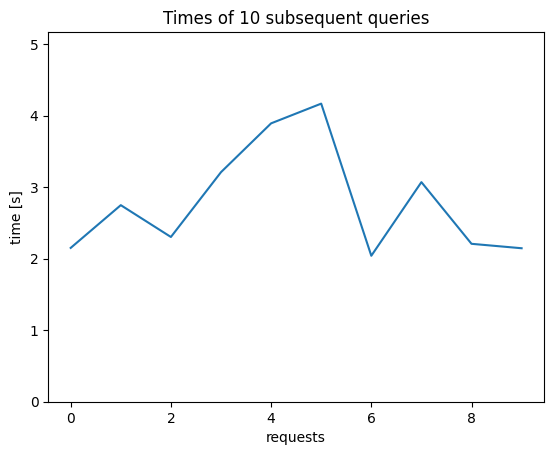

In [16]:
a = plt.subplot()
plt.plot(times)
a.set_title("Times of 10 subsequent queries")
a.set_ylim((0,max(times) + 1))
a.set_xlabel("requests")
a.set_ylabel("time [s]")